In [1]:
import numpy as np
from numba import jit
def yeet(*args, **kwargs):
    return jit(*args, **kwargs)
from tqdm import trange
from dask.distributed import Client, LocalCluster
import matplotlib.pyplot as plt

In [2]:
def mcheck(steps, N):
    prob = np.zeros(steps)
    for i in range(N):
        sig = 0
        k=1
        num = 0
        while sig==0:
            num+= np.random.uniform(-1, 1)
            sig = np.sign(num)
            k+=1
        k=0
        while k<steps:
            num += np.random.uniform(-1, 1)
            if np.sign(num) != sig:
                prob[k] +=1
                break
            k+=1
        
    return prob
fast_mcheck = yeet(mcheck)

In [3]:
# Veldig lite eksempel
%time prob =mcheck(100, 1000)

Wall time: 75.4 ms


In [4]:
steps = 1000
N = 40000000

In [5]:
%time prob1 =fast_mcheck(steps, N)

Wall time: 58.1 s


In [45]:
cluster = LocalCluster(n_workers=4, threads_per_worker=3)
client = Client(cluster)

In [51]:
client

Client Scheduler: tcp://127.0.0.1:58499 Dashboard: http://127.0.0.1:58500/status,Cluster Workers: 4 Cores: 12 Memory: 8.47 GB


In [ ]:
%%time 
future = client.submit(fast_mcheck,steps,N, pure=False)
prob2 = future.result()

In [53]:
%%time
# Go up an order 10 on both steps and N:
steps2 = 5*steps
N2 = 1000*steps

future2 = client.submit(fast_mcheck, steps2, N2, pure=False)
prob3 = future2.result()

Wall time: 5.39 s


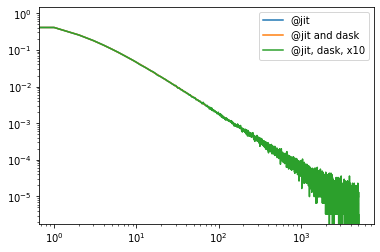

In [13]:
plt.loglog(prob1 / np.linalg.norm(prob1), label = '@jit')
plt.loglog(prob2/ np.linalg.norm(prob1), label ='@jit and dask')
plt.loglog(prob3/np.linalg.norm(prob3), label = '@jit, dask, x10')
plt.legend()
plt.show()